In [34]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Новый раздел

In [35]:
df = pd.read_csv('diabetes.csv') 

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Отбор первых 590 строк:

In [37]:
task_data = df.head(690)

Вывод числа строк в получившейся выборке и относящихся к классу 1 (пациент болен диабетом)

In [38]:
len(task_data[task_data['Outcome'] == 0])

453

Разделеные данных на тренировочные и тестовые. Первые 70% строк — тренировочные, остальные — тестовые.

In [39]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

Выделяем предикторы (8 первых столбцов) и отклик (Outcome):

In [40]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Подключем классификатор DecisionTreeClassifier:

In [41]:
from sklearn.tree import DecisionTreeClassifier

Задаем параметры дерева принятия решений и обучаем модель:

In [42]:
tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=2020)
clf=tree.fit(x, y)

Подключаем библиотеку для визуализации дерева. Сохраняем в файл и выводим на экран.

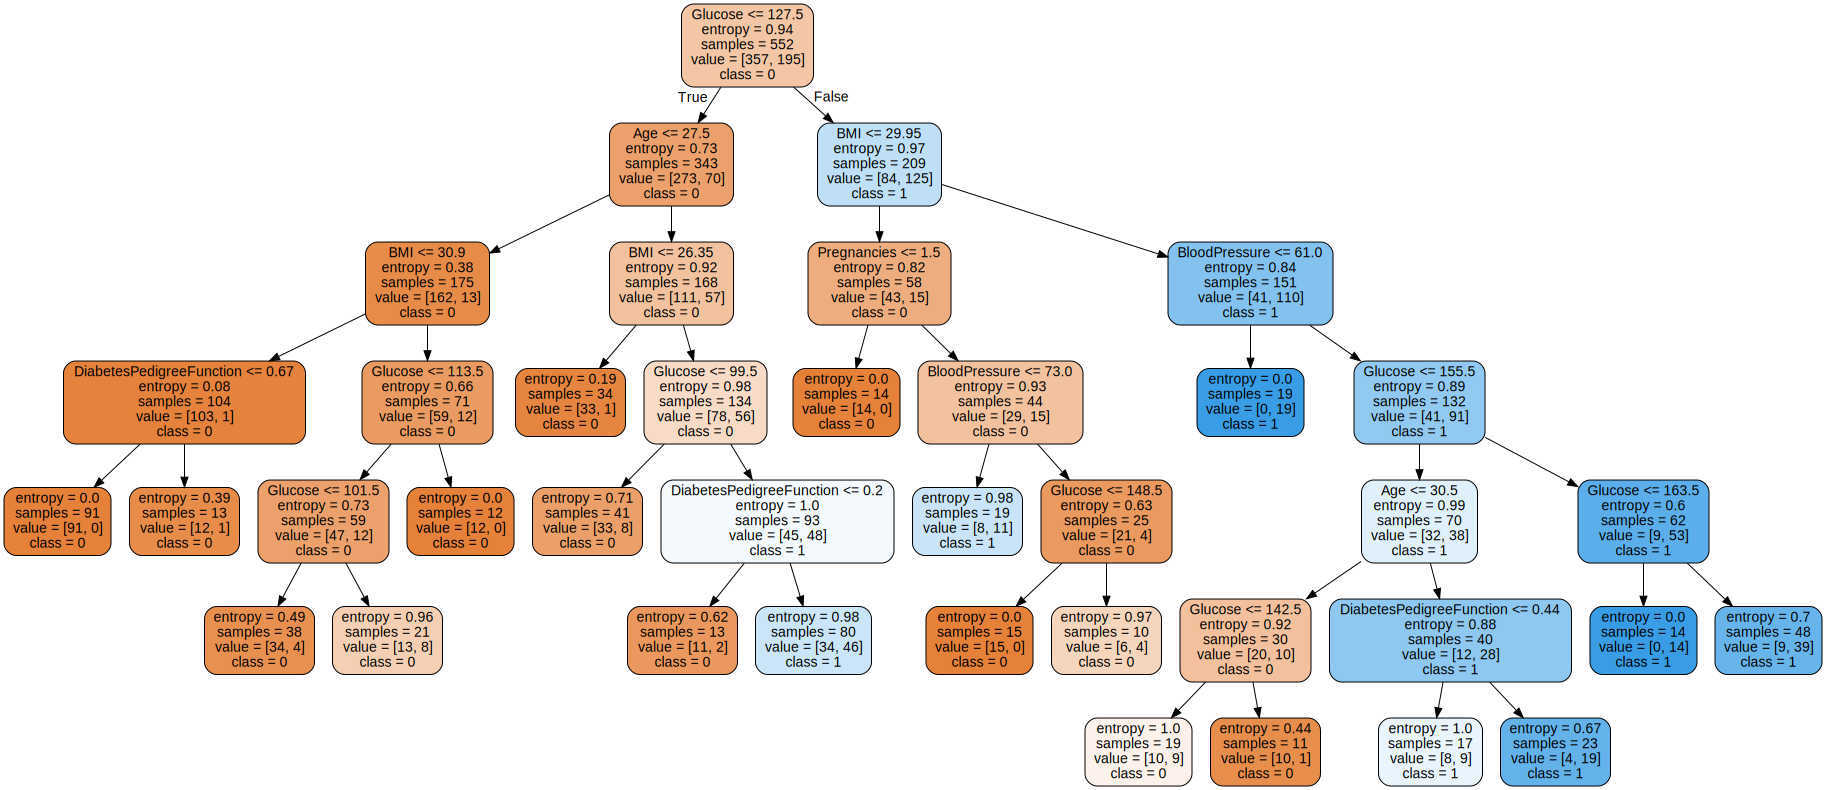

In [43]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(x.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Выводим глубину дерева:

In [44]:
clf.tree_.max_depth

6

Выполняем предсказание для объектов из тестовой выборки:

In [45]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

Доля правильных ответов классификатора:

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7898550724637681

Среднее значение метрик $F_1$ (Macro-F1):

In [47]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.7534955343393901

Выполним предсказание для конкретного объекта (с индексом 708) исходных данных:

In [57]:
df.loc[729, features]

Pregnancies                  2.000
Glucose                     92.000
BloodPressure               52.000
SkinThickness                0.000
Insulin                      0.000
BMI                         30.100
DiabetesPedigreeFunction     0.141
Age                         22.000
Name: 729, dtype: float64

Назначенный класс:

In [58]:
clf.predict([df.loc[729, features].tolist()])[0]

0